<a href="https://colab.research.google.com/github/KTM001/PDM01/blob/main/py-tensorflow/DL2_CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [3]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


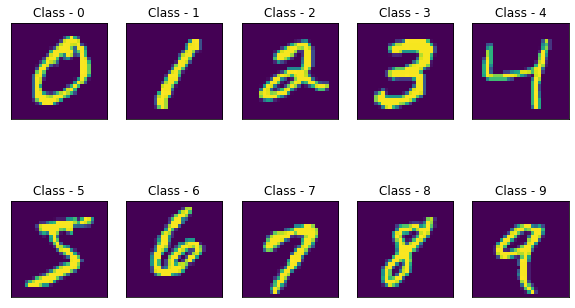

In [4]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])




# Design CNN

### import Conv2D, MaxPool2D

In [5]:
from keras.layers import Conv2D, MaxPool2D, Flatten

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(8) 

In [6]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [12]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(), #2차원을 1차원으로 변경시켜줌
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [13]:
c1f2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               802944    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

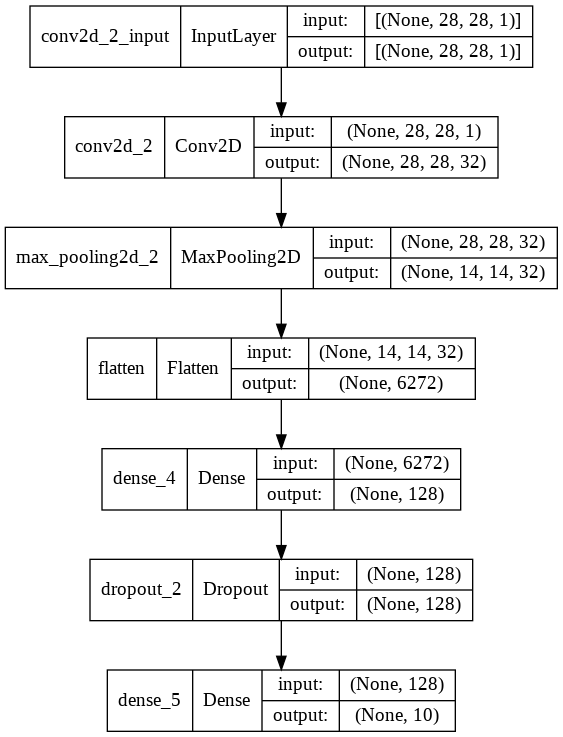

In [14]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [15]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
            validation_data = (X_test, y_test))

Epoch 1/20
600/600 [==============================] - 34s 8ms/step - loss: 0.2264 - accuracy: 0.9335 - val_loss: 0.0729 - val_accuracy: 0.9756
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0736 - accuracy: 0.9781 - val_loss: 0.0508 - val_accuracy: 0.9833
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0518 - accuracy: 0.9838 - val_loss: 0.0463 - val_accuracy: 0.9858
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0414 - val_accuracy: 0.9860
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0413 - val_accuracy: 0.9856
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0364 - val_accuracy: 0.9879
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0378 - val_accuracy: 0.9882
Epoch

In [36]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0465 - accuracy: 0.9885


[0.046500664204359055, 0.9884999990463257]

---

## **CNN1 + FCN3**

In [17]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [19]:
c1f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(), #2차원을 1차원으로 변경시켜줌
     
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [20]:
c1f3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                      

In [21]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2496 - accuracy: 0.9243
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0758 - accuracy: 0.9778
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0521 - accuracy: 0.9846
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0370 - accuracy: 0.9884
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0298 - accuracy: 0.9906
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0241 - accuracy: 0.9930
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0190 - accuracy: 0.9940
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0173 - accuracy: 0.9943
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0136 - accuracy: 0.9956

In [22]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0563 - accuracy: 0.9884


[0.05625997483730316, 0.9883999824523926]

## **CNN2 + FCN2**

In [49]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [50]:
c2f2 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [26]:
c2f2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [28]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0069 - accuracy: 0.9980
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0059 - accuracy: 0.9980
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0060 - accuracy: 0.9979
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0063 - accuracy: 0.9978
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0039 - accuracy: 0.9984
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0061 - accuracy: 0.9979
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0060 - accuracy: 0.9981
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0064 - accuracy: 0.9977
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0049 - accuracy: 0.9982
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0037 - accuracy: 0.9987

In [29]:
c2f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0524 - accuracy: 0.9911


[0.05240080505609512, 0.991100013256073]

## **CNN2 + FCN3**

In [30]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [31]:
c2f3 = tf.keras.models.Sequential([ 
     Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [32]:
c2f3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [33]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 7s 10ms/step - loss: 0.3020 - accuracy: 0.9068
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0885 - accuracy: 0.9747
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0613 - accuracy: 0.9821
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0509 - accuracy: 0.9853
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0418 - accuracy: 0.9874
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0366 - accuracy: 0.9898
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0319 - accuracy: 0.9905
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0268 - accuracy: 0.9914
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0228 - accuracy: 0.993

In [34]:
c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0338 - accuracy: 0.9922


[0.03384767845273018, 0.9922000169754028]

# **[DIY] Hidden layer에 따른 정확도**

In [35]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0563 - accuracy: 0.9884


[0.05625997483730316, 0.9883999824523926]

In [37]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0465 - accuracy: 0.9885


[0.046500664204359055, 0.9884999990463257]

In [40]:
# Try another method!!
cnn_result = [[0.046500664204359055, 0.9884999990463257], 
 [0.05625997483730316, 0.9883999824523926], 
 [0.05240080505609512, 0.991100013256073], 
 [0.03384767845273018, 0.9922000169754028]]

In [41]:
# select accuracies
accuracy = [row[1] for row in cnn_result]
accuracy

[0.9884999990463257, 0.9883999824523926, 0.991100013256073, 0.9922000169754028]

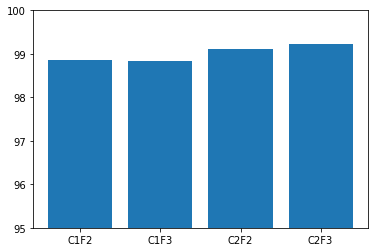

In [44]:
x = np.arange(4)
cnns = ['C1F2','C1F3','C2F2','C2F3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((95, 100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [45]:
c2f2.save('c2f2_best.hdf5')

In [46]:
from keras.models import load_model

model = load_model('c2f2_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0524 - accuracy: 0.9911


[0.05240080505609512, 0.991100013256073]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [51]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))

Epoch 1/20
600/600 [==============================] - 7s 10ms/step - loss: 0.2208 - accuracy: 0.9327 - val_loss: 0.0512 - val_accuracy: 0.9839
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0664 - accuracy: 0.9797 - val_loss: 0.0348 - val_accuracy: 0.9883
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0472 - accuracy: 0.9855 - val_loss: 0.0314 - val_accuracy: 0.9899
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.0273 - val_accuracy: 0.9899
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0305 - accuracy: 0.9902 - val_loss: 0.0277 - val_accuracy: 0.9906
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.0242 - val_accuracy: 0.9924
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0246 - val_accuracy: 0.9928

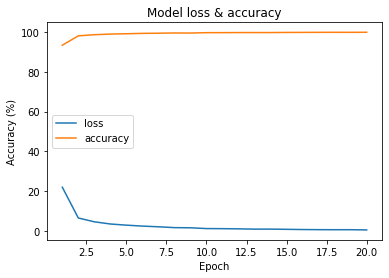

In [52]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

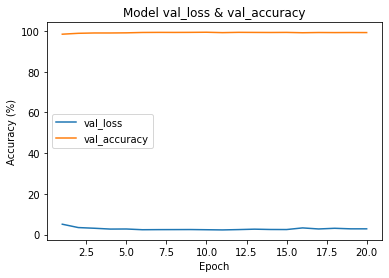

In [56]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

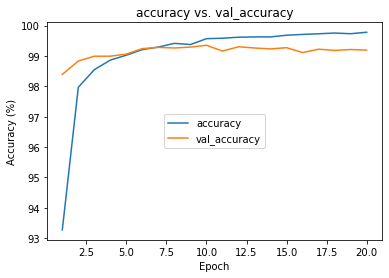

In [57]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [ ]:
# Code here!
hist = c2f3.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))

In [ ]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')